# MLZoomcamp 2022 - Session #2 - Homework

Author: José Victor

* Dataset: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

* Goal: Create a regression model for predicting housing prices (column `'median_house_value'`)

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set()

## EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail?

In [3]:
df = pd.read_csv("/home/jvictor/vs_code/mlzoomcamp2022_jvscursulim/02-regression/data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


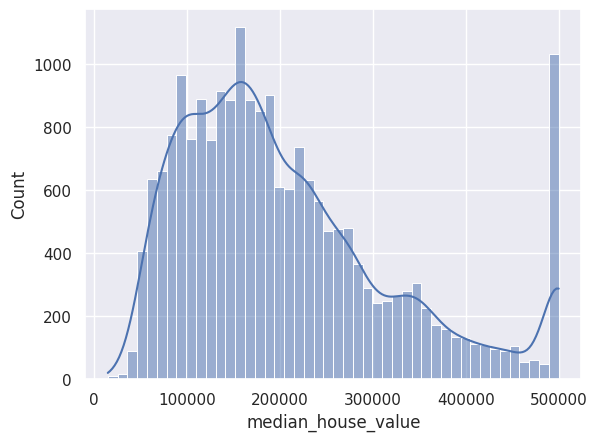

In [4]:
sns.histplot(data=df, x="median_house_value", kde=True)
plt.show()

In this homework we will only use the columns in the list defined in the code cell below.

In [5]:
columns = ['latitude',
            'longitude',
            'housing_median_age',
            'total_rooms',
            'total_bedrooms',
            'population',
            'households',
            'median_income',
            'median_house_value']

In [6]:
df_selected_columns = df[columns]
df_selected_columns.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Question 1

Find a feature with missing values. How many missing values does it have?

### Options:

* (X) 207
* ( ) 208
* ( ) 307
* ( ) 308

In [7]:
df_selected_columns.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [8]:
column_with_missing_values = "total_bedrooms"

## Question 2

What's the median (50% percentile) for variable 'population'?

### Options:

* ( ) 1133
* ( ) 1122
* (x) 1166
* ( ) 1188

In [9]:
pop_median = df_selected_columns["population"].median()
print(f"Median of the variable 'population': {pop_median}")

Median of the variable 'population': 1166.0


### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the `np.log1p()` function.

In [10]:
seed = 42
np.random.seed(seed=seed)

FEATURES = [col for col in columns if col != "median_house_value"]
TARGET = "median_house_value"

n = len(df_selected_columns)

df_selected_columns[TARGET] = df_selected_columns[TARGET].map(np.log1p)

train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_selected_columns_shuffled = df_selected_columns.iloc[idx]

df_train = df_selected_columns_shuffled.iloc[:n_train].copy()
df_val = df_selected_columns_shuffled.iloc[:n_val].copy()
df_test = df_selected_columns_shuffled.iloc[:n_test].copy()

y_train = df_train[TARGET].values
y_test = df_test[TARGET].values
y_val = df_val[TARGET].values

df_train = df_train.drop(TARGET, axis=1)
df_val = df_val.drop(TARGET, axis=1)
df_test = df_test.drop(TARGET, axis=1)

/tmp/ipykernel_2301/2457541349.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_columns[TARGET] = df_selected_columns[TARGET].map(np.log1p)


## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean. use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score,2)`
* Which option gives better RMSE?

### Options:

* ( ) With 0
* ( ) With mean
* ( ) With median
* (X) Both are equally good

In [11]:
def train_linear_regression(X: np.ndarray, y: np.ndarray) -> tuple:
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [12]:
def prepare_X_fill_zero(df: pd.DataFrame) -> np.ndarray:
    
    df_num = df[FEATURES]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X
    
def prepare_X_fill_mean(df: pd.DataFrame) -> np.ndarray:
    
    df_num = df[FEATURES]
    df_num = df_num.fillna(df[column_with_missing_values].mean())
    X = df_num.values
    
    return X

In [13]:
def rmse(y: np.ndarray, y_pred: np.ndarray) -> np.float64:
    
    error = y_pred - y
    mse = (error**2).mean()
    
    return np.sqrt(mse)

In [14]:
X_train = prepare_X_fill_zero(df=df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
score = rmse(y=y_train, y_pred=y_pred)
print(f"RMSE: {np.round(score,2)}")

RMSE: 0.34


In [15]:
X_train = prepare_X_fill_mean(df=df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
score = rmse(y=y_train, y_pred=y_pred)
print(f"RMSE: {np.round(score,2)}")

RMSE: 0.34


## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of `r` from this list `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

## Options:

* () 0
* (X) 0.000001
* () 0.001
* () 0.01

In [16]:
def train_linear_regression_reg(X: np.ndarray, 
                                y: np.ndarray, 
                                r: float=0.0) -> tuple:
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [17]:
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
rmse_scores = []

for r in r_list:
    
    X_train = prepare_X_fill_zero(df=df_train)
    w_0, w = train_linear_regression_reg(X=X_train, y=y_train, r=r)
    y_pred = w_0 + X_train.dot(w)
    score = np.round(rmse(y=y_train, y_pred=y_pred),2)
    rmse_scores.append((r,score))
    
print(rmse_scores)

[(0, 0.34), (1e-06, 0.34), (0.0001, 0.34), (0.001, 0.34), (0.01, 0.34), (0.1, 0.34), (1, 0.35), (5, 0.35), (10, 0.35)]


## Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std,3)`)

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

### Options:

* ( ) 0.5
* ( ) 0.05
* (X) 0.005
* ( ) 0.0005

In [18]:
seed_list = [i for i in range(10)]
rmse_scores = []

FEATURES = [col for col in columns if col != "median_house_value"]
TARGET = "median_house_value"

for seed in seed_list:
    
    np.random.seed(seed=seed)
    
    df_selected_columns = df[columns]
    df_selected_columns[TARGET] = df_selected_columns[TARGET].map(np.log1p)
    
    n = len(df_selected_columns)

    train_ratio = 0.6
    validation_ratio = 0.2
    test_ratio = 0.2

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_selected_columns_shuffled = df_selected_columns.iloc[idx]

    df_train = df_selected_columns_shuffled.iloc[:n_train].copy()
    df_val = df_selected_columns_shuffled.iloc[:n_val].copy()
    df_test = df_selected_columns_shuffled.iloc[:n_test].copy()

    y_train = df_train[TARGET].values
    y_test = df_test[TARGET].values
    y_val = df_val[TARGET].values
    
    df_train = df_train.drop(TARGET, axis=1)
    df_val = df_val.drop(TARGET, axis=1)
    df_test = df_test.drop(TARGET, axis=1)
    
    X_train = prepare_X_fill_zero(df=df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_train.dot(w)
    score = rmse(y=y_train, y_pred=y_pred)
    rmse_scores.append(score)
    
std_rmse_scores = np.round(np.std(rmse_scores),3)
print(f"Standard deviation of RMSE scores: {std_rmse_scores}")

/tmp/ipykernel_2301/237603961.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_columns[TARGET] = df_selected_columns[TARGET].map(np.log1p)
/tmp/ipykernel_2301/237603961.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_columns[TARGET] = df_selected_columns[TARGET].map(np.log1p)
/tmp/ipykernel_2301/237603961.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Standard deviation of RMSE scores: 0.002


/tmp/ipykernel_2301/237603961.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_columns[TARGET] = df_selected_columns[TARGET].map(np.log1p)


## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`.
* What's the RMSE on the test dataset?

### Options:

* (X) 0.35
* ( ) 0.035
* ( ) 0.45
* ( ) 0.045

In [19]:
FEATURES = [col for col in columns if col != "median_house_value"]
TARGET = "median_house_value"
    
np.random.seed(seed=9)
    
df_selected_columns = df[columns]
df_selected_columns[TARGET] = df_selected_columns[TARGET].map(np.log1p)
    
n = len(df_selected_columns)

train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_selected_columns_shuffled = df_selected_columns.iloc[idx]

df_train = df_selected_columns_shuffled.iloc[:n_train].copy()
df_val = df_selected_columns_shuffled.iloc[:n_val].copy()
df_test = df_selected_columns_shuffled.iloc[:n_test].copy()
df_train = pd.concat([df_train, df_val])

y_train = df_train[TARGET].values
y_test = df_test[TARGET].values
# y_val = df_val[TARGET].values
    
df_train = df_train.drop(TARGET, axis=1)
# df_val = df_val.drop(TARGET, axis=1)
df_test = df_test.drop(TARGET, axis=1)

    
X_train = prepare_X_fill_zero(df=df_train)
w_0, w = train_linear_regression_reg(X=X_train, y=y_train, r=0.001)
X_test = prepare_X_fill_zero(df=df_test)
y_pred = w_0 + X_test.dot(w)
score = rmse(y=y_test, y_pred=y_pred)
print(score)  

0.33758243303548147


/tmp/ipykernel_2301/3405626424.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_columns[TARGET] = df_selected_columns[TARGET].map(np.log1p)
